In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("University_Clustering.xlsx")
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [4]:
df.drop("State",axis=1,inplace=True)
df1=df.drop("Univ",axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

for i in df1:
    df1[i]=ss.fit_transform(df1[[i]])

In [6]:
df1.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [8]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

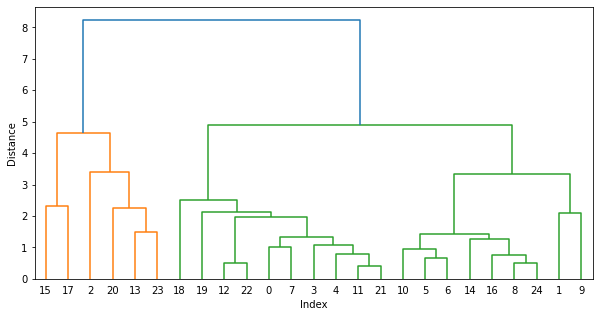

In [15]:
z=linkage(df1,method="complete")
#z object contain compelet distance between each data point with other
plt.figure(figsize=(10,5))
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0,
    leaf_font_size=10
)
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=3)
model.fit(df1)

AgglomerativeClustering(n_clusters=3)

In [17]:
model.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int64)

In [18]:
df["Labels"]=model.labels_

In [19]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Labels
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [20]:
df[df["Labels"]==0]["Univ"]

1          CalTech
5        Dartmouth
6             Duke
8          Harvard
9     JohnsHopkins
10             MIT
14       Princeton
16        Stanford
24            Yale
Name: Univ, dtype: object

In [21]:
df[df["Labels"]==2]["Univ"]

0            Brown
2              CMU
3         Columbia
4          Cornell
7       Georgetown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
Name: Univ, dtype: object

In [22]:
df["Labels"].value_counts()

2    12
0     9
1     4
Name: Labels, dtype: int64